# Problem Set 2: INFX 574 A

Prateek Tripathi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1 Gradient Descent

# 1.1 Implement the 1D GA Algorithm

Answer 2

In [2]:
## Note: you may be better of by not defining the function and using
## ufuncs instead.  But this method generalizes better.

# Define the function and gradient
def f(x):
    return -(x[0] ** 2)
def grad(x):
    return np.array([-(2 * (x[0]))])

# Assign starting value of x0 as 5, learning rate as 0.1 and a counter variable to record the number of iterations
x0 = np.array([5])
alpha = 0.1
counter = 0

# Print the starting value of the function and gradient
print("Value of function at the beginning: " + str(f(x0)))
print("Value of gradient at the beginning: " + str(grad(x0)[0]))

while True:
    x0 = x0 + (alpha * grad(x0))
    gradient = grad(x0)
    counter += 1
    
    print("\nIteration " + str(counter) + ":")
    print("\n\tValue of x: " + str(x0[0]))
    print("\n\tValue of function: " + str(f(x0)))
    print("\n\tValue of gradient: " + str(grad(x0)[0]))
    
    if ((abs(gradient) < 1e-6) or (counter >= 10000)):
        break

Value of function at the beginning: -25
Value of gradient at the beginning: -10

Iteration 1:

	Value of x: 4.0

	Value of function: -16.0

	Value of gradient: -8.0

Iteration 2:

	Value of x: 3.2

	Value of function: -10.240000000000002

	Value of gradient: -6.4

Iteration 3:

	Value of x: 2.56

	Value of function: -6.5536

	Value of gradient: -5.12

Iteration 4:

	Value of x: 2.048

	Value of function: -4.194304

	Value of gradient: -4.096

Iteration 5:

	Value of x: 1.6384

	Value of function: -2.68435456

	Value of gradient: -3.2768

Iteration 6:

	Value of x: 1.31072

	Value of function: -1.7179869184000003

	Value of gradient: -2.62144

Iteration 7:

	Value of x: 1.0485760000000002

	Value of function: -1.0995116277760004

	Value of gradient: -2.0971520000000003

Iteration 8:

	Value of x: 0.8388608000000002

	Value of function: -0.7036874417766403

	Value of gradient: -1.6777216000000004

Iteration 9:

	Value of x: 0.6710886400000001

	Value of function: -0.45035996273704976

	V

Stopping Criterion: If absolute value of the gradient gets below (1e-6)

Bail-out Number of Iterations: 10,000

Answer 3

I started with x0 as 5 and changed the value of learning rate from 0.1 to 0.5, and I observed that the number of iterations required to get the gradient below 1e-6 reduced from 73 to 1. 

The number of iterations started increasing again beyond the value of 0.5.

I also observed that for any value of x0, the number of iterations required stayed at 1 for the learning rate of 0.5.

This is mathematically true as per our gradient ascent calculation for the function -(x^2).

# 1.2 Implement The 2D Version

Answer 7

In [3]:
import math

# Define the function and gradient for the 2D case (-x'Ax)
def fnd(x, A):
    return -((np.transpose(x).dot(A)).dot(x))
def gradnd(x, A):
    return -2*(np.dot(A, x))

# Define input x2 and A2 (-x'Ax)
x2 = np.matrix([[2], [-3]])
A2 = np.matrix([[1, 2], [2, 8]])

# Define learning rate
alpha2 = 0.1
# alpha2 = 0.1089

def gradient_descent(x, A, alpha, print_iter = False):
    pointx = x[:]    
    # pointx1 = np.array([x[0]])
    # pointx2 = np.array([x[1]])
    
    # Define counter variable to record the number of iterations
    counter = 0
    
    # Print the starting value of the function and gradient
    print("\nInitial Input")
    print("\n\tValue of x: " + str(x))
    print("\n\tValue of function: " + str(fnd(x2, A2)))
    print("\n\tValue of gradient: " + str(gradnd(x2, A2)))

    while True:
        x = x + (alpha * gradnd(x, A))
        gradient = gradnd(x, A)
        counter += 1
        
        if (print_iter):
            print("\nIteration " + str(counter) + ":")
            print("\n\tValue of x: " + str(x))
            print("\n\tValue of function: " + str(fnd(x, A)))
            print("\n\tValue of gradient: " + str(gradnd(x, A)))
    
        if counter < 100:
            pointx = np.concatenate((pointx, x), axis = 1)
            
        if ((math.sqrt(np.transpose(gradient).dot(gradient)) < 1e-6) or (counter >= 10000)):
            if(not(print_iter)):
                print("\nIteration " + str(counter) + ":")
                print("\n\tValue of x: " + str(x))
                print("\n\tValue of function: " + str(fnd(x, A)))
                print("\n\tValue of gradient: " + str(gradnd(x, A)))
            break
        
    return (np.concatenate((pointx, x), axis = 1))

gradient_steps = gradient_descent(x2, A2, alpha2)


Initial Input

	Value of x: [[ 2]
 [-3]]

	Value of function: [[-52]]

	Value of gradient: [[ 8]
 [40]]

Iteration 150:

	Value of x: [[ 1.00579570e-06]
 [-2.67103569e-07]]

	Value of function: [[-5.07773039e-13]]

	Value of gradient: [[-9.43177125e-07]
 [ 2.50474302e-07]]


We observe that for the starting value of x as (2, -3)', if we keep the learning rate at 0.1, the convergence happens in 150 iterations for the stopping criterion f'(x) < 1e-6.

If we keep the learning rate 0.2, it never converges and if we keep it at 0.09, it converges in 168 iterations.

I observed that when we keep the value of learning rate between 0.1089 and 0.1099, it took 137 iterations to converge.

Answer 8

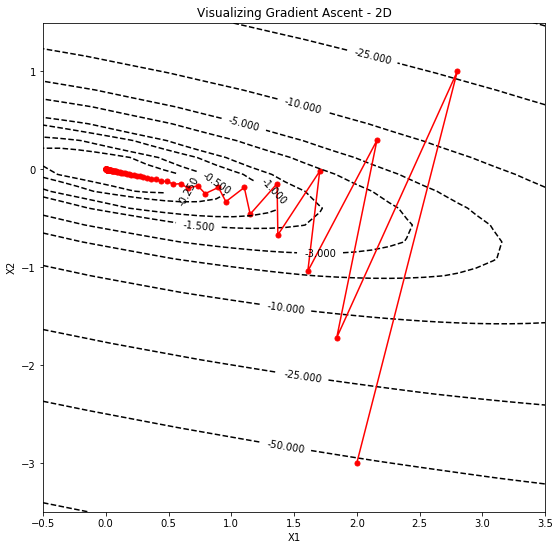

In [4]:
## create 30x30 grid matrix
n = 30
ex1 = np.linspace(-0.5, 3.5, num=n)
ex2 = np.linspace(-3.5, 1.5, num=n)
grid1, grid2 = np.meshgrid(ex1, ex2)

## fill the grid via looping.  You may prefer to use ufuncs instead.
z = np.empty_like(grid1)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        g = np.array([grid1[i,j], grid2[i,j]])
        z[i,j] = fnd(g, A2)
        
## Make the plot
plt.figure(figsize=(9,9))
p = plt.contour(grid1, grid2, z,
                levels = [-100, -50, -25, -10, -5, -3, -1.5, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 1.5, 3],
                colors = 'black')
plt.title("Visualizing Gradient Ascent - 2D")
plt.xlabel("X1")
plt.ylabel("X2")
plt.clabel(p, inline=1, fontsize=10)

# Plot the values
plt.scatter(np.array(gradient_steps)[0], np.array(gradient_steps)[1], c='red', s=25)
plt.plot(np.array(gradient_steps)[0], np.array(gradient_steps)[1], c='red')

Answer 9

In [5]:
# Define input x9 and A9 (-x9'A9x9)
x5 = np.matrix([[10], [20], [30], [40], [50]])
A5 = np.matrix((0.5 * ((np.arange(1, 26, 1).reshape(5, 5)) + np.transpose(np.arange(1, 26, 1).reshape(5, 5)))) + (10 * np.eye(5)))

# Define learning rate as 0.01
# alpha5 = 0.015
alpha5 = 0.0116

gradient_steps_5D = gradient_descent(x5, A5, alpha5)


Initial Input

	Value of x: [[10]
 [20]
 [30]
 [40]
 [50]]

	Value of function: [[-52]]

	Value of gradient: [[ 8]
 [40]]

Iteration 205:

	Value of x: [[-8.88913890e-08]
 [-5.24296768e-08]
 [-1.59679645e-08]
 [ 2.04937477e-08]
 [ 5.69554600e-08]]

	Value of function: [[-5.38958068e-14]]

	Value of gradient: [[ 7.07882562e-07]
 [ 4.57687252e-07]
 [ 2.07491943e-07]
 [-4.27033666e-08]
 [-2.92898676e-07]]


If we take the learning rate as 0.1, we observe that it doesn't converge and the value of the function gets high (-52 to -1.018e+08) from the first iteration itself.

It suggests that out learning rate is very high for the given problem.

Next, I tried with a learning rate of 0.01, where it converged in 238 iterations. Next, I tested the function with the learning rate of 0.02, and again it didn't converge. Next, I tried with a learning rate of 0.009, where it converged in 266 iterations.

It was inferred from these observations that the optimal learning rate must be slightly greater than 0.01. 

After trying with multiple learning rates, I arrived at 0.0116, where the convergence was achieved in 205 iterations.

Based on these observations, I inferred the following:

1- If the learning rate is too small, it may take many iterations to converge.

2- If the learning rate is too big, it gets unstable and we may never be sure of convergence (or may even diverge). It may even get worse from the current situation and we may end up oscillating between positive and negative gradients.

Furthermore, it was easier to get the 1D case to converge as compared to the 2D case, and it was easier to get the 2D case to converge as compared to the 5D case. This was also observed with the speed of getting these cases to converge, as the 1D case converged in lesser number of iterations as compared to the 5D case.

# 1.3 Condition Numbers

Answer 10

In [6]:
# Calculate the condition number using the numpy.linalg.cond() function
print("Condition number as per numpy.linalg.cond(): " + str(np.linalg.cond(A5)))

# Calculate the condition number using the method described in Greene, Appendix 6.6, p 829.
eig_val, eigen_vec = np.linalg.eig(A5)

print("Condition number as per Greene (2003): " + str(math.sqrt(max(eig_val) / min(eig_val))))

Condition number as per numpy.linalg.cond(): 22.037957076517493
Condition number as per Greene (2003): 4.694460254014033


Condition number of the 5D matrix above is 22.03796 (as per the numpy.linalg.cond() function). It is 4.69446 as per the method described in Greene (2003) (which is the square root of the value given by numpy.linalg.cond() function). 

Answer 11

In [7]:
# Define the simple singular matrix A as described in Q11
singularA = np.matrix([[1, 1], [1, 1]])

# Calculate its determinant
np.linalg.det(singularA)

0.0

As the determinant of the matrix is 0, we determine that it is a singular matrix.

Answer 12


Hyperparameters

X: [[ 2]
 [-3]]

alpha: 100

Learning Rate: 0.005

C: [[101.   1.]
 [  1. 101.]]

Condition Number (as per numpy.linalg.cond() function (refer Answer 10)): 1.0199999999999998

Eigen Values: [102. 100.]

Eigen Factors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Initial Input

	Value of x: [[ 2]
 [-3]]

	Value of function: [[-52]]

	Value of gradient: [[ 8]
 [40]]

Iteration 5:

	Value of x: [[1.6e-09]
 [1.6e-09]]

	Value of function: [[-5.2224e-16]]

	Value of gradient: [[-3.264e-07]
 [-3.264e-07]]


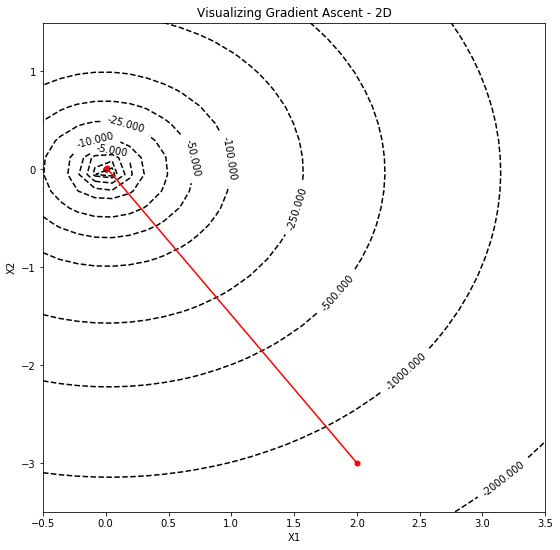


Hyperparameters

X: [[ 2]
 [-3]]

alpha: 1

Learning Rate: 0.25

C: [[2. 1.]
 [1. 2.]]

Condition Number (as per numpy.linalg.cond() function (refer Answer 10)): 2.999999999999999

Eigen Values: [3. 1.]

Eigen Factors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Initial Input

	Value of x: [[ 2]
 [-3]]

	Value of function: [[-52]]

	Value of gradient: [[ 8]
 [40]]

Iteration 23:

	Value of x: [[ 3.57627869e-07]
 [-2.38418579e-07]]

	Value of function: [[-1.98951966e-13]]

	Value of gradient: [[-9.53674316e-07]
 [ 2.38418579e-07]]


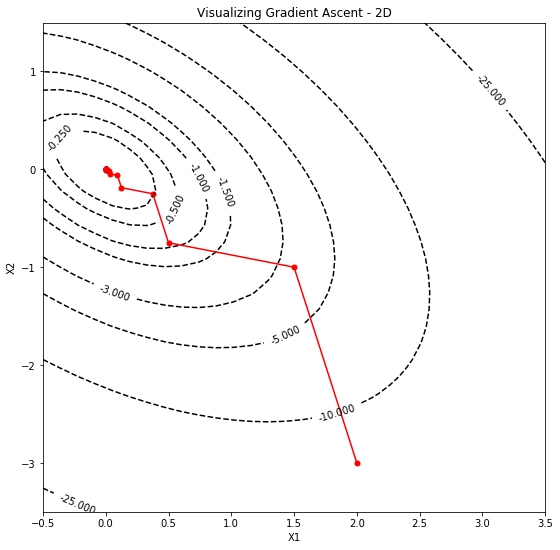


Hyperparameters

X: [[ 2]
 [-3]]

alpha: 0.01

Learning Rate: 0.45

C: [[1.01 1.  ]
 [1.   1.01]]

Condition Number (as per numpy.linalg.cond() function (refer Answer 10)): 201.00000000000261

Eigen Values: [2.01 0.01]

Eigen Factors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Initial Input

	Value of x: [[ 2]
 [-3]]

	Value of function: [[-52]]

	Value of gradient: [[ 8]
 [40]]

Iteration 1236:

	Value of x: [[ 3.5073326e-05]
 [-3.5073326e-05]]

	Value of function: [[-2.4602764e-11]]

	Value of gradient: [[-7.01466521e-07]
 [ 7.01466521e-07]]


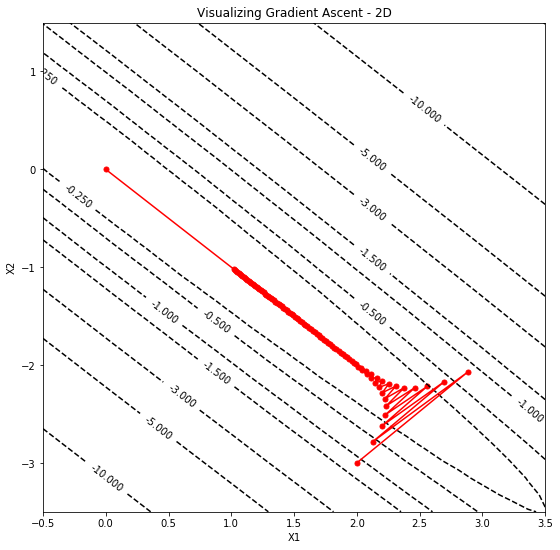

In [8]:
# Create C = A + alpha * I2 for alpha = c(100, 1, 0.01)

# a)
# Define the hyperparameters: alpha12, x12
alpha12 = [100, 1, 0.01]
learn_rate12 = [0.005, 0.25, 0.45]
x12 = np.matrix([[2], [-3]])

# Define a function for each of the steps in Q12
def varying_cond(alpha, x, learn_rate):
    
    for i in np.arange(len(alpha)):
        
        # Calculate the C matrix as per C = A + (alpha * I2)
        C = singularA + (alpha[i] * np.eye(2))
        
        # Calculate the eigen_values and eigen_factors for C
        eigen_values, eigen_factors = np.linalg.eig(C)
        
        # Print the hyperparameters
        print("\nHyperparameters")
        print("\nX: " + str(x))
        print("\nalpha: " + str(alpha[i]))
        print("\nLearning Rate: " + str(learn_rate[i]))
        print("\nC: " + str(C))
        
        # Print the calculated parameters
        print("\nCondition Number (as per numpy.linalg.cond() function (refer Answer 10)): " + str(np.linalg.cond(C)))
        print("\nEigen Values: " + str(eigen_values))
        print("\nEigen Factors: " + str(eigen_factors) + "\n")
        
        gradient_steps = gradient_descent(x, C, learn_rate[i])
        
        ## create 30x30 grid matrix
        n = 30
        ex1 = np.linspace(-0.5, 3.5, num=n)
        ex2 = np.linspace(-3.5, 1.5, num=n)
        grid1, grid2 = np.meshgrid(ex1, ex2)

        ## fill the grid via looping.  You may prefer to use ufuncs instead.
        z = np.empty_like(grid1)
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                g = np.array([grid1[i,j], grid2[i,j]])
                z[i,j] = fnd(g, C)
        
        ## Make the plot
        plt.figure(figsize=(9,9))
        p = plt.contour(grid1, grid2, z,
                        levels = [-2000, -1000, -500, -250, -100, -50, -25, -10, -5, -3, -1.5, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 1.5, 3],
                        colors = 'black')
        plt.title("Visualizing Gradient Ascent - 2D")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.clabel(p, inline=1, fontsize=10)

        # Plot the values
        plt.scatter(np.array(gradient_steps)[0], np.array(gradient_steps)[1], c='red', s=25)
        plt.plot(np.array(gradient_steps)[0], np.array(gradient_steps)[1], c='red')
        plt.show()

# Call the varying_cond() function
varying_cond(alpha12, x12, learn_rate12)

Observations (for x = (2, -3)'):

1- For alpha value of 100 and learning rate of 0.005, the condition number is 1.0199. Convergence was achieved in 5 iterations.

2- For alpha value of 1 and learning rate of 0.25, the condition number is 2.9999. Convergence was achieved in 23 iterations.

3- For alpha value of 0.01 and learning rate of 0.45, the condition number is 201.0000. Convergence was achieved in 1236 iterations.

Answer 13

We observe that as the condition number increases, the number of iterations required for convergence increases as well. Furthermore, it gets difficult to find the optimal learning rate as the condition number gets high.

# 2 Outliers in Different Distributions

# 2.1 Normal Distribution

Answer 1

In [9]:
# Initialize the number of repetitions and sample sizes
r = 1000

ss = [10, 1000, 100000]

Answer 2, 3, and 4

In [10]:
# Set the seed at 7
np.random.seed(7)

# Define a function to answer 
def r_means_norm(r, ss):
    for i in ss:
        means = []
        for j in np.arange(r):
            means = np.append(means, np.mean(np.random.normal(loc = 0, scale = 1, size = i)))
        mean_of_means = (np.mean(means))
        std_of_means = np.std(means)
        conf_region = [np.percentile(means, 2.5), np.percentile(means, 97.5)]
        print("For N as " + str(i) + ":")
        print("\tMean of Means: " + str(mean_of_means))
        print("\tStandard Deviation of Means: " + str(std_of_means))
        print("\t95% Confidence Region: " + str(conf_region) + "\n")

# Call function r_means_norm()
r_means_norm(r, ss)

For N as 10:
	Mean of Means: -0.00907361738597595
	Standard Deviation of Means: 0.3233405804466076
	95% Confidence Region: [-0.5838500888497504, 0.6322122312157556]

For N as 1000:
	Mean of Means: -0.0003409158469957384
	Standard Deviation of Means: 0.03184951355730348
	95% Confidence Region: [-0.0643242713534611, 0.062172551572355336]

For N as 100000:
	Mean of Means: -0.00018223619978344606
	Standard Deviation of Means: 0.0032097300795456652
	95% Confidence Region: [-0.006350689606753482, 0.0061226799061032955]



We observe that as we increase the sample size, we get closer to the mean of the standard normal distribution.

This is indicated by the fact that the value of Means of Means, Standard Deviation of Means and 95% Confidence Region get closer to 0 as we increase the sample size from 10, 1000, to 100000.

# 2.2 Pareto Distribution

Answer 5

In [11]:
# Define parameters for Pareto Distribution
x0 = 1
k = 0.5    # k <= 1

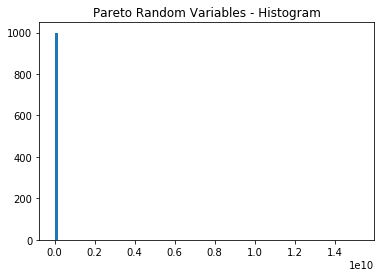

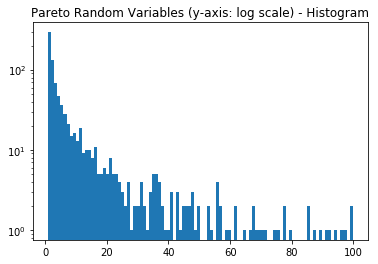

In [12]:
# Create 1000 number of pareto random variables
pareto_random = np.random.pareto(a = k, size = 1000) + x0

# Plot the histogram of pareto_random
plt.hist(pareto_random, 100)
plt.title("Pareto Random Variables - Histogram")
plt.show()

# Plot the histogram on the y-log scale, where the value of pareto_random is less than 100
plt.hist(pareto_random[pareto_random < 100], 100, log = True)
plt.title("Pareto Random Variables (y-axis: log scale) - Histogram")
plt.show()

Answer 6

In [13]:
# Initialize the number of repetitions and sample sizes
r_p = 1000

ss_p = [10, 1000, 100000]

Answer 7, 8, and 9

In [14]:
# Define a function to answer 
def r_means_pareto(r, ss):
    for i in ss:
        means = []
        for j in np.arange(r):
            means = np.append(means, np.mean(np.random.pareto(a = k, size = i) + x0))
        mean_of_means = (np.mean(means))
        std_of_means = np.std(means)
        conf_region = [np.percentile(means, 2.5), np.percentile(means, 97.5)]
        print("For N as " + str(i) + ":")
        print("\tMean of Means: " + str(mean_of_means))
        print("\tStandard Deviation of Means: " + str(std_of_means))
        print("\t95% Confidence Region: " + str(conf_region) + "\n")

# Call function r_means_pareto()
r_means_pareto(r_p, ss_p)

For N as 10:
	Mean of Means: 66259.50390409055
	Standard Deviation of Means: 1183489.8252048476
	95% Confidence Region: [3.9393192166686646, 28646.059416391592]

For N as 1000:
	Mean of Means: 7029775.660424907
	Standard Deviation of Means: 134045347.57851502
	95% Confidence Region: [311.6861879971503, 1195669.4117339756]

For N as 100000:
	Mean of Means: 731883065.1979645
	Standard Deviation of Means: 22236622904.038105
	95% Confidence Region: [28279.17040791498, 106610391.55790706]



Answer 10

We observe that with 'Normal' distribution, as we increase the size of the sample, our outcome gets closer to the mean value of the distribution.

With 'Pareto' distribution, we observe that the Mean of Means, Standard Deviation of Means, and 95% Confidence Region, all increase exponentialy as we increase the sample size of the distribution from 10 to 1000 to 100000.